<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

In [80]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

#  4.1 선형 회귀(Linear Regression)

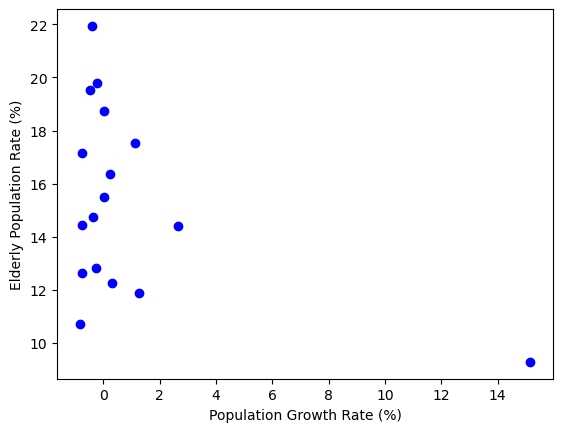

In [81]:
# 4.1 지역별 인구증가율과 고령인구비율 시각화 (데이터 파악)
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

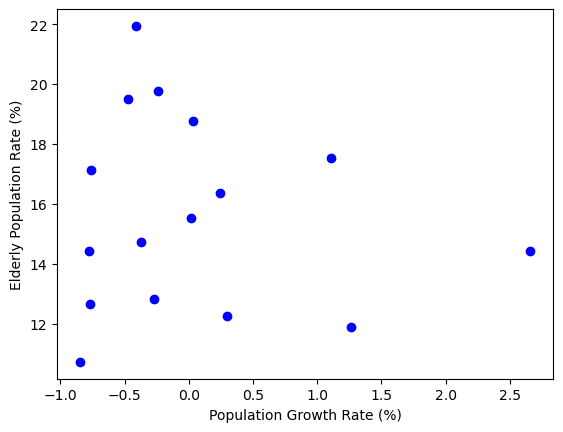

In [82]:
# 4.2 지역별 인구증가율과 고령인구비율 시각화: 극단치 제거
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:] # 극단치 제거(15.17 제거)
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a: -0.355834147915461 b: 15.669317743971302


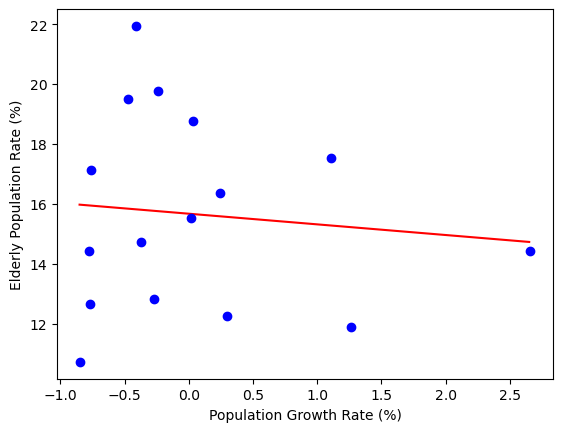

In [83]:
# 4.3 최소제곱법으로 회귀선 구하기
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구합니다.
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: 0.10304296 b: 7.0424366 loss: 84.03124
199 a: -0.13216412 b: 11.463723 loss: 27.426802
299 a: -0.2658748 b: 13.977731 loss: 12.635633
399 a: -0.32640517 b: 15.115931 loss: 10.08633
499 a: -0.34804246 b: 15.5228 loss: 9.802221
599 a: -0.35417274 b: 15.63808 loss: 9.781776
699 a: -0.3555513 b: 15.664 loss: 9.780832
799 a: -0.35579592 b: 15.668604 loss: 9.780804
899 a: -0.35583016 b: 15.669244 loss: 9.780804
999 a: -0.35583344 b: 15.669303 loss: 9.780803


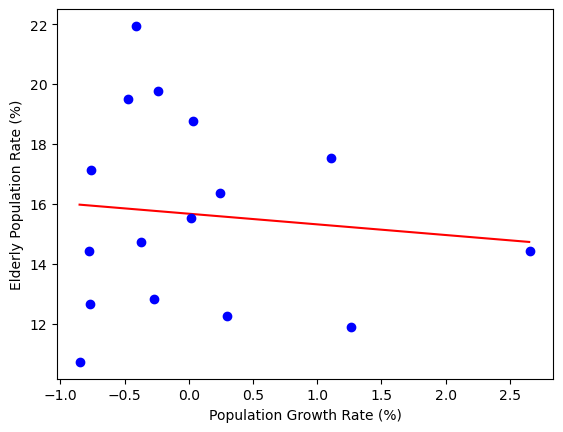

In [84]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
# X, Y : 데이터 분포
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b # 분포한 평균을 지나는 선 = 회귀선
    loss = tf.reduce_mean((Y - y_pred) ** 2) # Y - y_pred : 잔차 -> 0으로 만드는(최솟값을) a값을 찾는것이 목적
    return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.07) # 경사하강법을 이용할 떄 Adam과 SGD등을 사용할 판단력 키우기
# learning rate : 변화량
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy()) #loss가 큰이유 : 데이터 산포가 커서

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 4.2 다항 회귀(Polynomial Regression)

99 a: 3.7671747 b: -5.159739 c: 6.4260283 loss: 69.287315
199 a: 2.7419283 b: -4.6469135 c: 10.354126 loss: 31.143486
299 a: 1.2906433 b: -2.4433322 c: 12.96191 loss: 15.996006
399 a: 0.33318308 b: -0.9370007 c: 14.581049 loss: 10.987292
499 a: -0.18211256 b: -0.12581022 c: 15.452023 loss: 9.734148
599 a: -0.42122105 b: 0.25055894 c: 15.85631 loss: 9.4951935
699 a: -0.51742345 b: 0.4019842 c: 16.018976 loss: 9.460347
799 a: -0.55103767 b: 0.4548934 c: 16.075813 loss: 9.456462
899 a: -0.56122416 b: 0.4709275 c: 16.09304 loss: 9.456134
999 a: -0.5638958 b: 0.47513282 c: 16.097559 loss: 9.456113


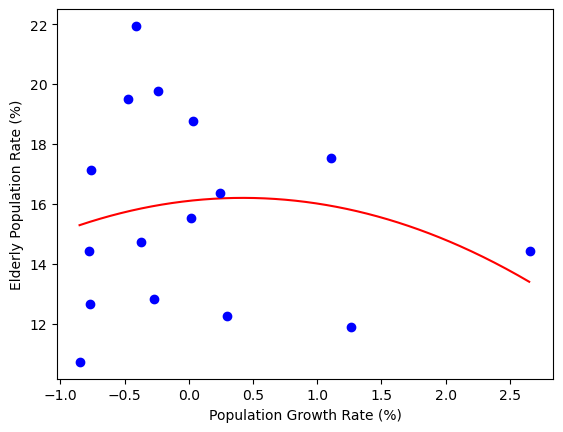

In [85]:
# 4.5 텐서플로우를 이용해서 2차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X + b * X + c # 다항회귀로 회귀선 표시
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: -1.3487165 b: 6.1644115 c: -3.6012614 d: 6.9629583 loss: 55.733177
199 a: -1.9322375 b: 6.565609 c: -2.147815 d: 10.373006 loss: 28.296032
299 a: -1.4695994 b: 4.5034375 c: -0.87163925 d: 12.479338 loss: 18.379087
399 a: -0.6958138 b: 2.0985546 c: -0.5173747 d: 13.97689 loss: 12.994352
499 a: -7.9697464e-05 b: 0.07047591 c: -0.43476674 d: 15.080539 loss: 10.152684
599 a: 0.51988184 b: -1.4265406 c: -0.40548873 d: 15.870287 loss: 8.828143
699 a: 0.8734712 b: -2.4423852 c: -0.3892746 d: 16.402987 loss: 8.2850685
799 a: 1.0970291 b: -3.0844154 c: -0.3794173 d: 16.739248 loss: 8.088873
899 a: 1.2290536 b: -3.463542 c: -0.3736452 d: 16.937757 loss: 8.026407
999 a: 1.3019419 b: -3.6728442 c: -0.37046877 d: 17.04733 loss: 8.0089035


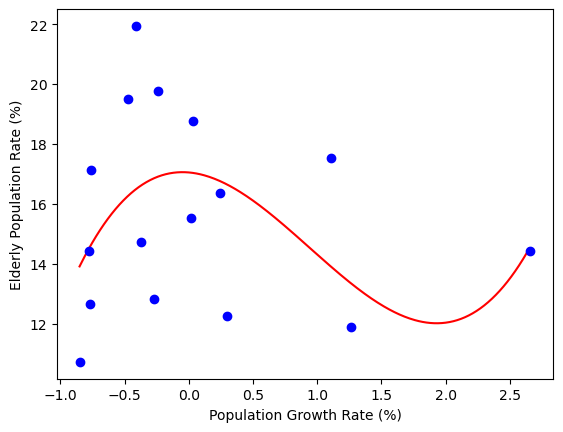

In [86]:
# 4.6 텐서플로우를 이용해서 3차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c, d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d # 다항회귀로 회귀선 표시
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 4.3 딥러닝 네트워크를 이용한 회귀

In [87]:
# 4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 6)                 12        
                                                                 
 dense_31 (Dense)            (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [88]:
# 4.8 딥러닝 네트워크의 학습
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 367ms/step - loss: 254.8320
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 118.1343
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 10.1525
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 9.6993
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 9.6651
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 9.6479
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 9.6352
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 9.6245
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 9.6148
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 9.6055


In [89]:
# 4.9 딥러닝 네트워크의 Y값 예측
model.predict(X)

1/1 [==============================] - 0s 49ms/step


array([[15.721021 ],
       [15.944504 ],
       [14.979138 ],
       [15.826179 ],
       [15.125333 ],
       [15.748242 ],
       [15.892045 ],
       [15.924489 ],
       [15.944173 ],
       [15.912625 ],
       [15.946364 ],
       [15.917751 ],
       [15.89736  ],
       [15.829262 ],
       [15.943824 ],
       [13.8649645]], dtype=float32)

11/11 [==============================] - 0s 761us/step


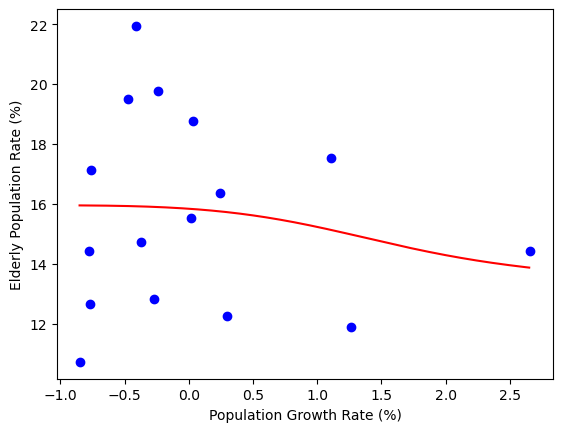

In [90]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

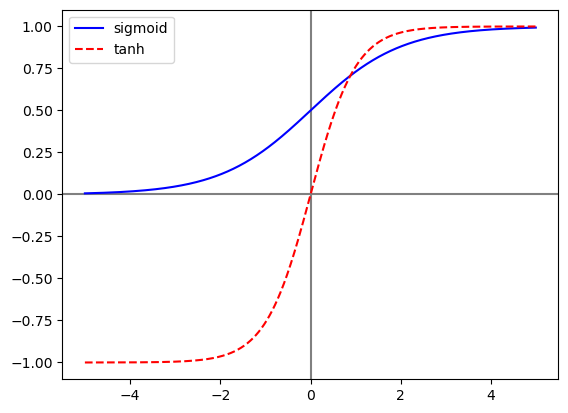

In [91]:
# 그림 4.2 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

# 4.4 보스턴 주택 가격 데이터세트(Boston Housing Dataset)

In [92]:
# 4.11 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])
print(train_X.shape) # row, column수
print(test_X.shape)

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2
(404, 13)
(102, 13)


In [93]:
# 4.12 데이터 전처리(정규화) -> 0과 1 사이의 값으로 모으기
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [94]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)), # 입력단자가 13개 ->  cloumn수가 13개
    tf.keras.layers.Dense(units=39, activation='relu'), # units는 감으로.......시그널보내시그널 보내 찌리시싯ㅅ
    tf.keras.layers.Dense(units=26, activation='relu'), # 통상적으로 많이 사용되는 수를 사용하긴함.
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 52)                728       
                                                                 
 dense_33 (Dense)            (None, 39)                2067      
                                                                 
 dense_34 (Dense)            (None, 26)                1040      
                                                                 
 dense_35 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


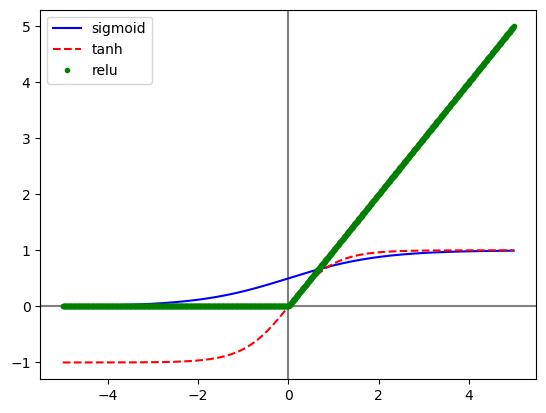

In [95]:
# 그림 4.5 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [96]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)
# 훈련데이터 입/출력, epochs, batch_size : 하나당 32개를 가짐?/ validation_split: 1/4를 사용

Epoch 1/25
10/10 [==============================] - 1s 12ms/step - loss: 3.9883 - val_loss: 1.0855
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6452 - val_loss: 1.0557
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.5861 - val_loss: 0.9462
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.5718 - val_loss: 0.8981
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4937 - val_loss: 0.8212
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4896 - val_loss: 0.8087
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4771 - val_loss: 0.6840
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3978 - val_loss: 0.6857
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3821 - val_loss: 0.5760
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3298 - val_loss: 0.5338
Epoch 11/25
10/10 

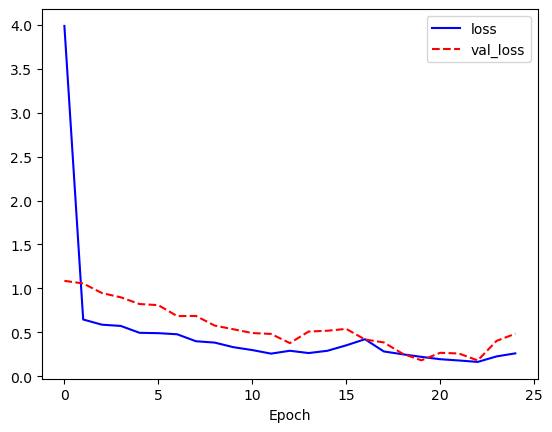

In [97]:
# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss') # 훈련(train)데이터 loss
plt.plot(history.history['val_loss'], 'r--', label='val_loss') # test데이터 loss
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [98]:
# 4.16 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.3253


0.32525837421417236

4/4 [==============================] - 0s 1ms/step


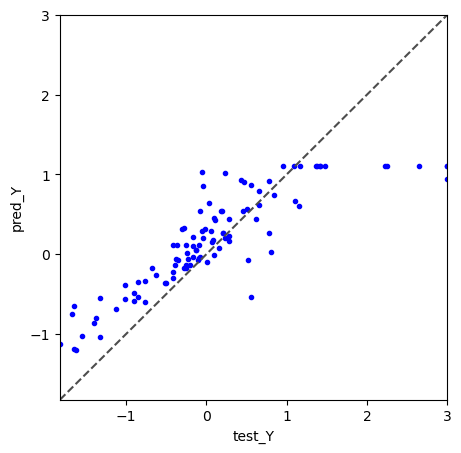

In [99]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
#                x축 좌표값                y축 좌표값      
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [100]:
# 4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])
# callbacks : 과적합을 줄이기 위해 val_loss를 모니터링하다가 3번의 값 변화가 없을 경우 종료
# patience : 훈련이 진행됨에도 더이상 변화(개선)되는 값이 없을 경우 최적의 monitor값을 기준으로 몇변의 epoch를 진행할 지 정하는 값.

Epoch 1/25
10/10 [==============================] - 1s 12ms/step - loss: 1.8520 - val_loss: 0.7828
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.5464 - val_loss: 0.9615
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4766 - val_loss: 0.6069
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3738 - val_loss: 0.4873
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2779 - val_loss: 0.4310
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2252 - val_loss: 0.4557
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2355 - val_loss: 0.4896
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2769 - val_loss: 0.3622
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2138 - val_loss: 0.3878
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1877 - val_loss: 0.3475
Epoch 11/25
10/10 

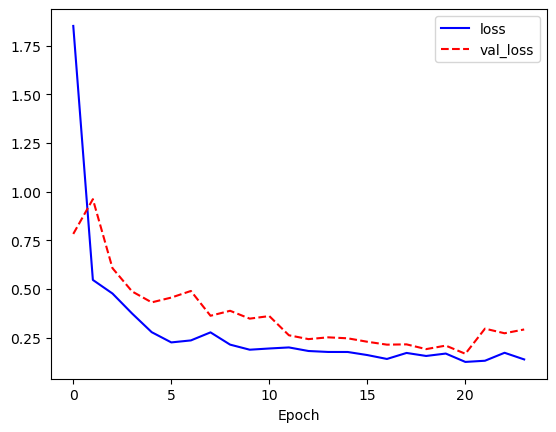

In [101]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [102]:
# 4.20 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.2918


0.29179465770721436

4/4 [==============================] - 0s 998us/step


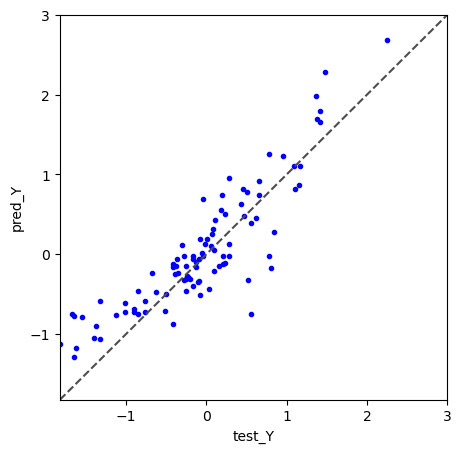

In [103]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()